## Установка библиотек

## Импорт библиотек

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

## Загрузка данных

EXAMPLE PATH

In [2]:
Example_Train_NII_Path = "data/tr/imagesTr/la_016.nii"
Example_Label_NII_Path = "data/tr/labelsTr/la_016.nii"

In [3]:
Example_Reading_Train_NII = nib.load(Example_Train_NII_Path)
Example_Reading_Label_NII = nib.load(Example_Label_NII_Path)

In [4]:
print(type(Example_Reading_Train_NII))

<class 'nibabel.nifti1.Nifti1Image'>


In [5]:
print(Example_Reading_Train_NII.extra)

{}


In [6]:
print(Example_Reading_Train_NII.dataobj.dtype)

float32


In [7]:
print(Example_Reading_Train_NII.get_data_dtype())

float32


In [8]:
print(Example_Reading_Train_NII.get_filename())

data/tr/imagesTr/la_016.nii


In [9]:
print(Example_Reading_Train_NII.get_fdata())

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [10]:
print(Example_Reading_Train_NII.file_map.keys())

dict_keys(['image'])


In [11]:
print(Example_Reading_Train_NII.file_map.items())

dict_items([('image', <nibabel.fileholders.FileHolder object at 0x000001C5063E11C0>)])


In [12]:
print(Example_Reading_Train_NII.file_map["image"].filename)

data/tr/imagesTr/la_016.nii


In [13]:
print(Example_Reading_Train_NII.get_qform())

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [14]:
print(Example_Reading_Train_NII.get_fdata()) # image

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [15]:
print(Example_Reading_Train_NII.get_fdata().shape)

(320, 320, 90)


In [16]:
print(Example_Reading_Train_NII.get_fdata()[0].shape)

(320, 90)


In [17]:
Example_ALL_Images = Example_Reading_Train_NII.get_fdata()
Example_ALL_Labels = Example_Reading_Label_NII.get_fdata()

In [18]:
print(Example_ALL_Images[0].shape)
print(Example_ALL_Labels[0].shape)

(320, 90)
(320, 90)


In [19]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


In [20]:
print(Example_ALL_Images.shape[0]//2)

160


In [21]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2])

[[ 48.  68.  46. ... 273. 276. 261.]
 [ 44.  55.  39. ... 283. 276. 240.]
 [ 46.  39.  33. ... 252. 251. 211.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [22]:
print(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


EXAMPLE VISION

In [23]:
Example_Train_NII_Path = "data/tr/imagesTr/la_016.nii"
Example_Label_NII_Path = "data/tr/labelsTr/la_016.nii"

In [24]:
Example_Reading_Train_NII = nib.load(Example_Train_NII_Path)
Example_Reading_Label_NII = nib.load(Example_Label_NII_Path)

In [25]:
print(type(Example_Reading_Train_NII))

<class 'nibabel.nifti1.Nifti1Image'>


In [26]:
print(Example_Reading_Train_NII) # general info


<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 90)
affine:
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320  90   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code    

In [27]:
print(Example_Reading_Train_NII.affine)

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [28]:
print(Example_Reading_Train_NII.extra)

{}


In [29]:
print(Example_Reading_Train_NII.dataobj.dtype)

float32


In [30]:
print(Example_Reading_Train_NII.get_data_dtype())

float32


In [31]:
print(Example_Reading_Train_NII.get_filename())

data/tr/imagesTr/la_016.nii


In [32]:
print(Example_Reading_Train_NII.get_fdata())

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [33]:
print(Example_Reading_Train_NII.file_map.keys())

dict_keys(['image'])


In [34]:
print(Example_Reading_Train_NII.file_map.items())

dict_items([('image', <nibabel.fileholders.FileHolder object at 0x000001C50624EAB0>)])


In [35]:
print(Example_Reading_Train_NII.file_map["image"].filename)

data/tr/imagesTr/la_016.nii


In [36]:
print(Example_Reading_Train_NII.get_qform())

[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]


In [37]:
print(Example_Reading_Train_NII.get_fdata()) # image

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [38]:
print(Example_Reading_Train_NII.get_fdata().shape)

(320, 320, 90)


In [39]:
print(Example_Reading_Train_NII.get_fdata()[0].shape)

(320, 90)


In [40]:
Example_ALL_Images = Example_Reading_Train_NII.get_fdata()
Example_ALL_Labels = Example_Reading_Label_NII.get_fdata()

In [41]:
print(Example_ALL_Images[0].shape)
print(Example_ALL_Labels[0].shape)

(320, 90)
(320, 90)


In [42]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


In [43]:
print(Example_ALL_Images.shape[0]//2)

160


In [44]:
print(Example_ALL_Images[Example_ALL_Images.shape[0]//2])

[[ 48.  68.  46. ... 273. 276. 261.]
 [ 44.  55.  39. ... 283. 276. 240.]
 [ 46.  39.  33. ... 252. 251. 211.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [45]:
print(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)

(320, 90)


EXAMPLE VISION

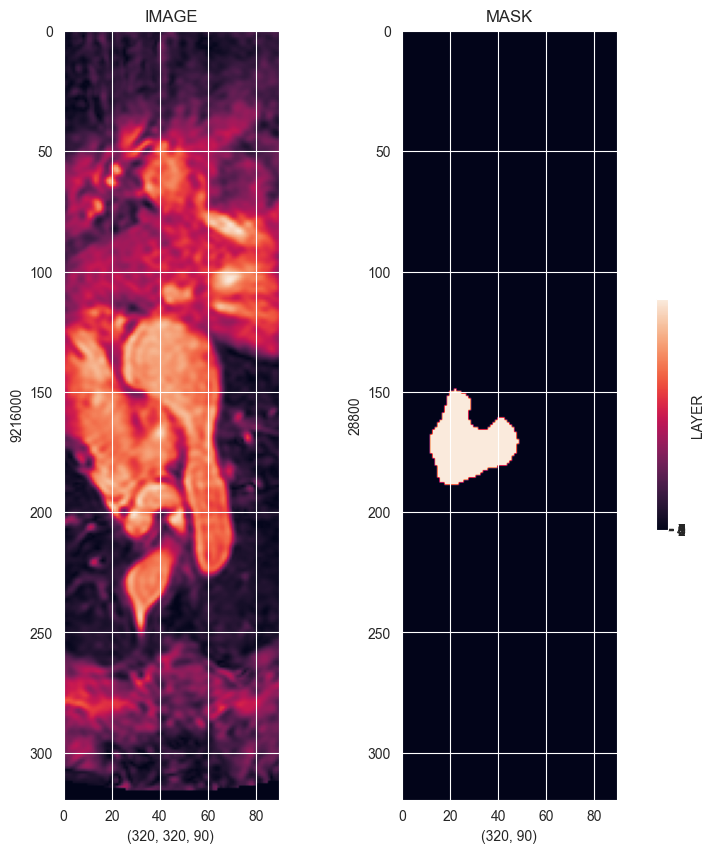

In [46]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2])
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2])
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

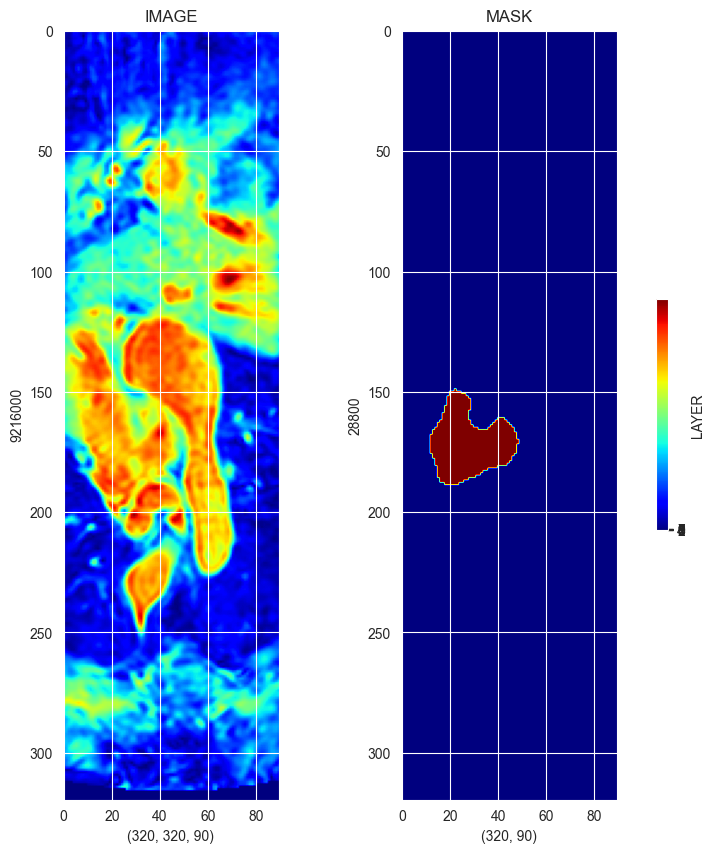

In [47]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="jet")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

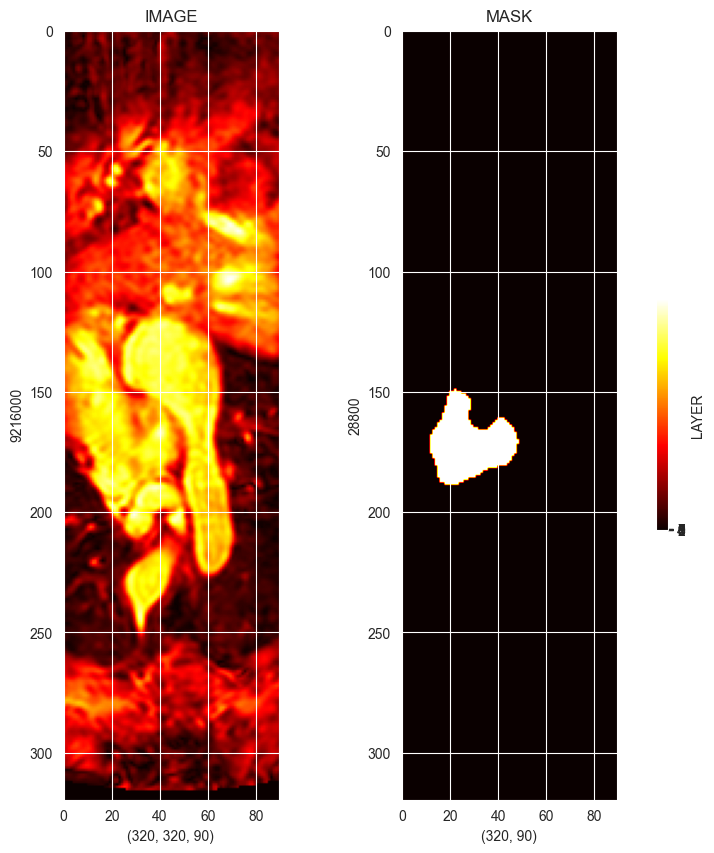

In [48]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="hot")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

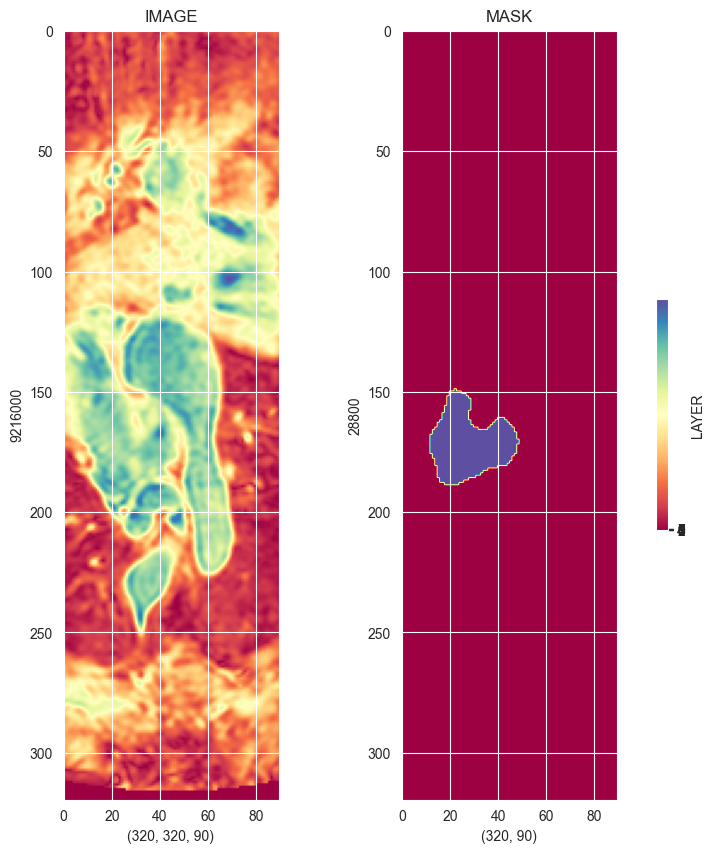

In [49]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Plot_Color_Op = axis[0].imshow(Example_ALL_Images[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[0].set_xlabel(Example_ALL_Images.shape)
axis[0].set_ylabel(Example_ALL_Images.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Example_ALL_Labels[Example_ALL_Images.shape[0]//2],cmap="Spectral")
axis[1].set_xlabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].shape)
axis[1].set_ylabel(Example_ALL_Labels[Example_ALL_Images.shape[0]//2].size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

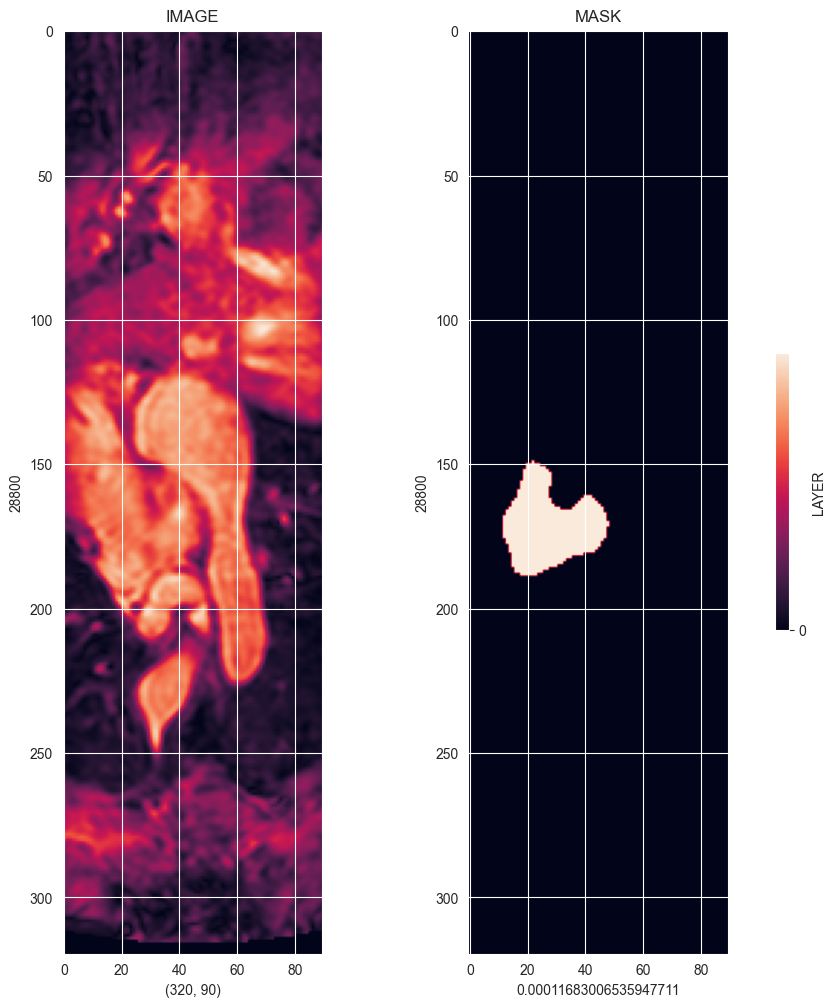

In [50]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Example_ALL_Images[Example_ALL_Images.shape[0]//2] / 255.
Picking_Example_Label = Example_ALL_Labels[Example_ALL_Images.shape[0]//2] / 255.

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

Plot_Color_Op = axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

figure.colorbar(Plot_Color_Op, ax=axis.ravel().tolist(), shrink=0.3, ticks=range(10),label='LAYER')

## DATA PROCESS

PATH PROCESS

In [51]:
Main_NII_Path = Path("data/tr/imagesTr")
Label_NII_Path = Path("data/tr/labelsTr")

In [52]:
NII_Images = list(Main_NII_Path.glob(r"*.nii"))
NII_Labels = list(Label_NII_Path.glob(r"*.nii"))

In [53]:
print(len(NII_Images))
print(len(NII_Labels))

20
20


In [54]:
Images_Series = pd.Series(NII_Images,name="IMAGE").astype(str)
Labels_Series = pd.Series(NII_Labels,name="LABEL").astype(str)

In [55]:
Main_Data = pd.concat([Images_Series,Labels_Series],axis=1)

In [56]:
print(Main_Data.head(-1))

                          IMAGE                        LABEL
0   data\tr\imagesTr\la_003.nii  data\tr\labelsTr\la_003.nii
1   data\tr\imagesTr\la_004.nii  data\tr\labelsTr\la_004.nii
2   data\tr\imagesTr\la_005.nii  data\tr\labelsTr\la_005.nii
3   data\tr\imagesTr\la_007.nii  data\tr\labelsTr\la_007.nii
4   data\tr\imagesTr\la_009.nii  data\tr\labelsTr\la_009.nii
5   data\tr\imagesTr\la_010.nii  data\tr\labelsTr\la_010.nii
6   data\tr\imagesTr\la_011.nii  data\tr\labelsTr\la_011.nii
7   data\tr\imagesTr\la_014.nii  data\tr\labelsTr\la_014.nii
8   data\tr\imagesTr\la_016.nii  data\tr\labelsTr\la_016.nii
9   data\tr\imagesTr\la_017.nii  data\tr\labelsTr\la_017.nii
10  data\tr\imagesTr\la_018.nii  data\tr\labelsTr\la_018.nii
11  data\tr\imagesTr\la_019.nii  data\tr\labelsTr\la_019.nii
12  data\tr\imagesTr\la_020.nii  data\tr\labelsTr\la_020.nii
13  data\tr\imagesTr\la_021.nii  data\tr\labelsTr\la_021.nii
14  data\tr\imagesTr\la_022.nii  data\tr\labelsTr\la_022.nii
15  data\tr\imagesTr\la_

In [57]:
Or_1_0 = []
Image_List = []
Label_List = []

for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    if np.mean(Selecting_Label) > 0:
        Or_1_0.append(1)
        Selecting_Image = Selecting_Image.astype("float32")
        Selecting_Label = Selecting_Label.astype("float32")
    
        Image_List.append(Selecting_Image)
        Label_List.append(Selecting_Label)
    else:
        Or_1_0.append(0)

In [58]:
for i_img,i_mask in zip(Main_Data["IMAGE"].values,Main_Data["LABEL"].values):
    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    print(np.shape(Selecting_Image))
    print(np.shape(Selecting_Label))
    print("---"*20)

(320, 130)
(320, 130)
------------------------------------------------------------
(320, 110)
(320, 110)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 130)
(320, 130)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 90)
(320, 90)
------------------------------------------------------------
(320, 120)
(320, 120)
------------------------------------------------------------
(320, 122)
(320, 122)
------------------------------------------------------------
(320, 100)
(320, 100)
------------------------------------------------------------
(320, 

In [59]:
print(Or_1_0)

[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [60]:
print(len(Or_1_0))

20


In [61]:
Main_Data["1_OR_0"] = Or_1_0

In [62]:
print(Main_Data.head(-1))

                          IMAGE                        LABEL  1_OR_0
0   data\tr\imagesTr\la_003.nii  data\tr\labelsTr\la_003.nii       0
1   data\tr\imagesTr\la_004.nii  data\tr\labelsTr\la_004.nii       1
2   data\tr\imagesTr\la_005.nii  data\tr\labelsTr\la_005.nii       1
3   data\tr\imagesTr\la_007.nii  data\tr\labelsTr\la_007.nii       1
4   data\tr\imagesTr\la_009.nii  data\tr\labelsTr\la_009.nii       1
5   data\tr\imagesTr\la_010.nii  data\tr\labelsTr\la_010.nii       0
6   data\tr\imagesTr\la_011.nii  data\tr\labelsTr\la_011.nii       1
7   data\tr\imagesTr\la_014.nii  data\tr\labelsTr\la_014.nii       1
8   data\tr\imagesTr\la_016.nii  data\tr\labelsTr\la_016.nii       1
9   data\tr\imagesTr\la_017.nii  data\tr\labelsTr\la_017.nii       1
10  data\tr\imagesTr\la_018.nii  data\tr\labelsTr\la_018.nii       1
11  data\tr\imagesTr\la_019.nii  data\tr\labelsTr\la_019.nii       1
12  data\tr\imagesTr\la_020.nii  data\tr\labelsTr\la_020.nii       1
13  data\tr\imagesTr\la_021.nii  d

READING PROCESS

In [63]:
print(len(Image_List))
print(len(Label_List))

18
18


In [64]:
print(Image_List[0].shape)
print(Label_List[0].shape)

(320, 110)
(320, 110)


In [65]:
print(type(Image_List[0]))
print(type(Label_List[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [66]:
Testing_Trans = cv2.resize(Image_List[8],(256,256))

In [67]:
print(Testing_Trans.shape)

(256, 256)


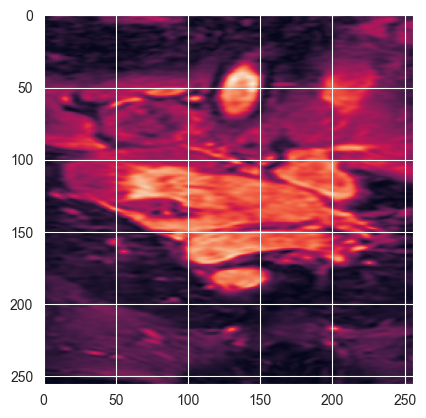

In [68]:
plt.imshow(Testing_Trans)

In [69]:
True_Seg = Main_Data[Main_Data["1_OR_0"] == 1]

In [70]:
Image_List = []
Label_List = []

for i_img,i_mask in zip(True_Seg["IMAGE"].values,True_Seg["LABEL"].values):

    Reading_Train_NII = nib.load(i_img)
    Reading_Label_NII = nib.load(i_mask)
    
    X_Images = Reading_Train_NII.get_fdata()
    X_Labels = Reading_Label_NII.get_fdata()
     
    Selecting_Image = X_Images[X_Images.shape[0]//2] / 255.
    Selecting_Label = X_Labels[X_Images.shape[0]//2] / 255.
    
    Selecting_Image = Selecting_Image.astype("float32")
    Selecting_Label = Selecting_Label.astype("float32")
    
    Resized_IMG = cv2.resize(Selecting_Image,(256,256))
    Resized_LABEL = cv2.resize(Selecting_Label,(256,256))
    
    Image_List.append(Resized_IMG)
    Label_List.append(Resized_LABEL)

In [71]:
print(len(Image_List))
print(len(Label_List))

18
18


In [72]:
for indexing_i in range(len(Image_List)):
    print("---"*10)
    print(Image_List[indexing_i].shape)
    print(Label_List[indexing_i].shape)

------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)
------------------------------
(256, 256)
(256, 256)


In [73]:
print(np.shape(np.array(Image_List)))
print(np.shape(np.array(Label_List)))

(18, 256, 256)
(18, 256, 256)


CHECKING

Text(0.5, 1.0, 'MASK')

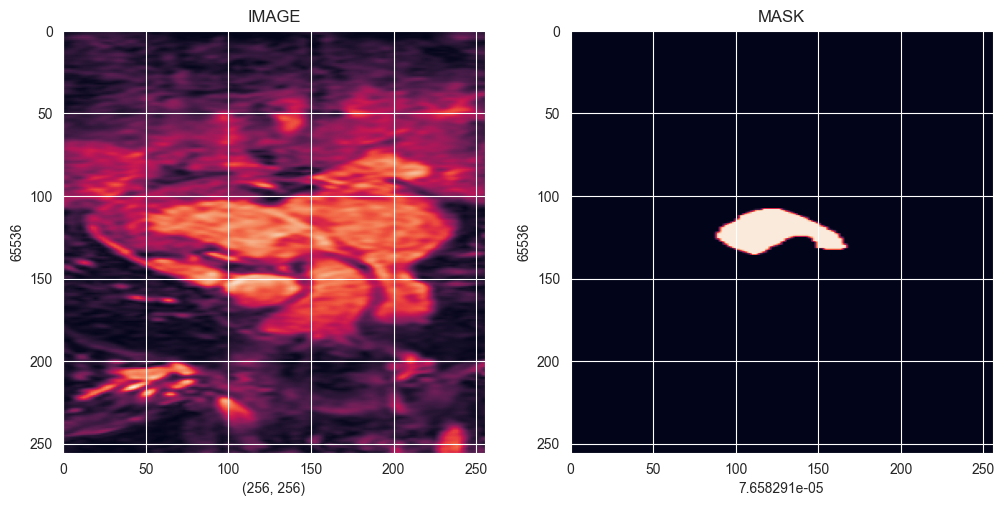

In [74]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

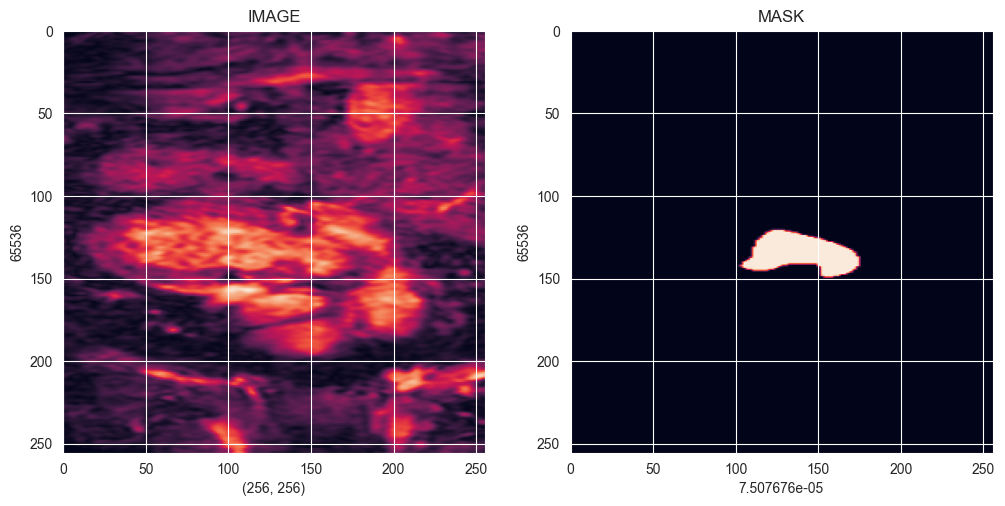

In [75]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[2]
Picking_Example_Label = Label_List[2]

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Picking_Example_Label)
axis[1].set_xlabel(np.mean(Picking_Example_Label))
axis[1].set_ylabel(Picking_Example_Label.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

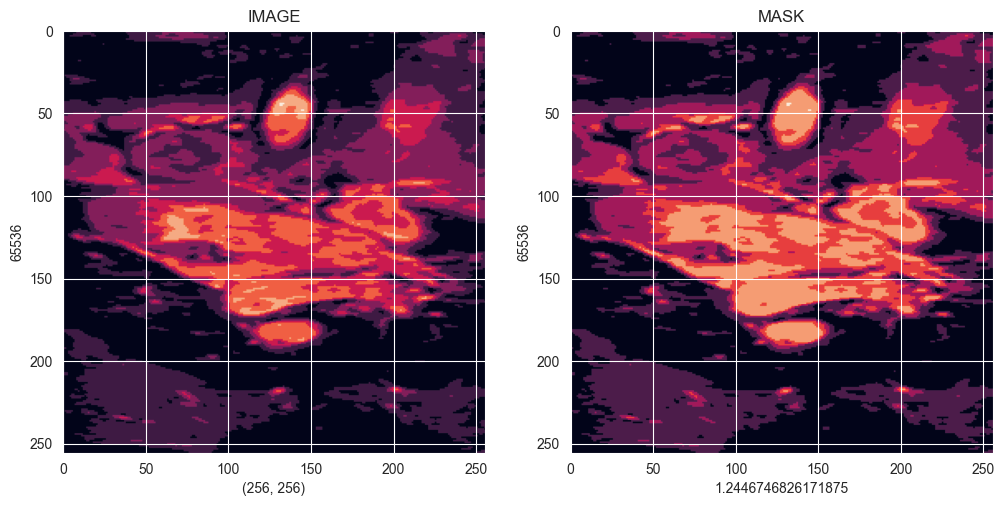

In [76]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[8]
Picking_Example_Label = Label_List[8]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

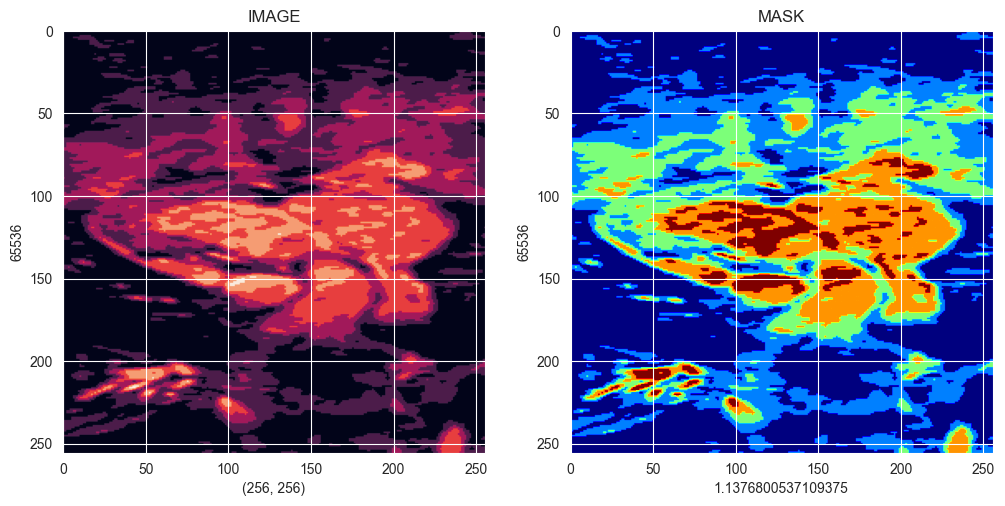

In [77]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="jet")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

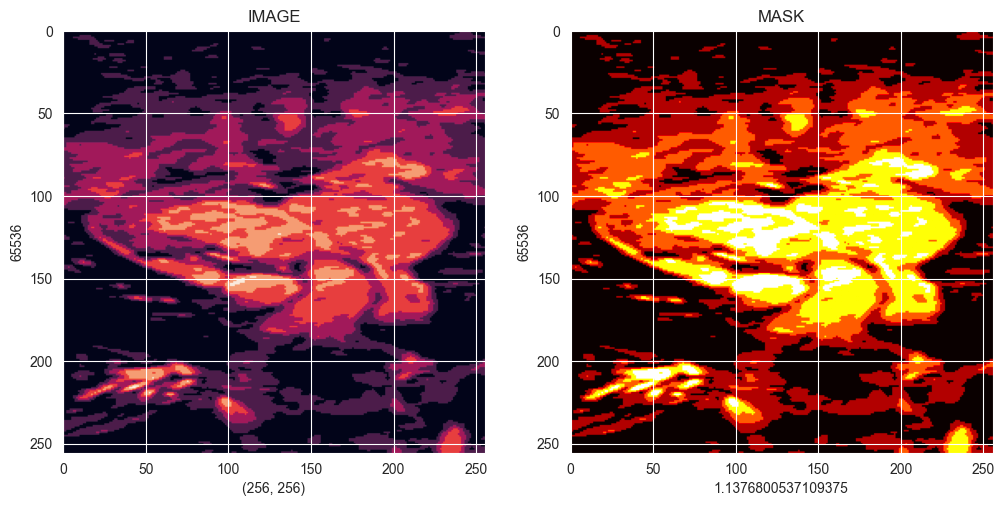

In [78]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[0]
Picking_Example_Label = Label_List[0]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Canny_Image = cv2.Canny(Picking_Example_Label,10,100)

NP_Kernel = np.ones((5,5),np.uint8)
Dilation_Image = cv2.dilate(Canny_Image,NP_Kernel,iterations = 5)

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Dilation_Image,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="hot")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

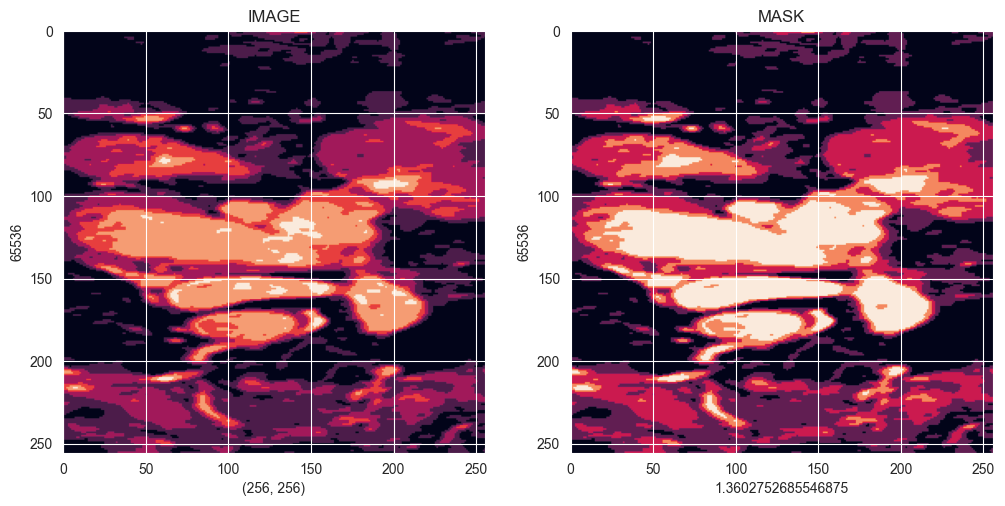

In [79]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image)
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

Text(0.5, 1.0, 'MASK')

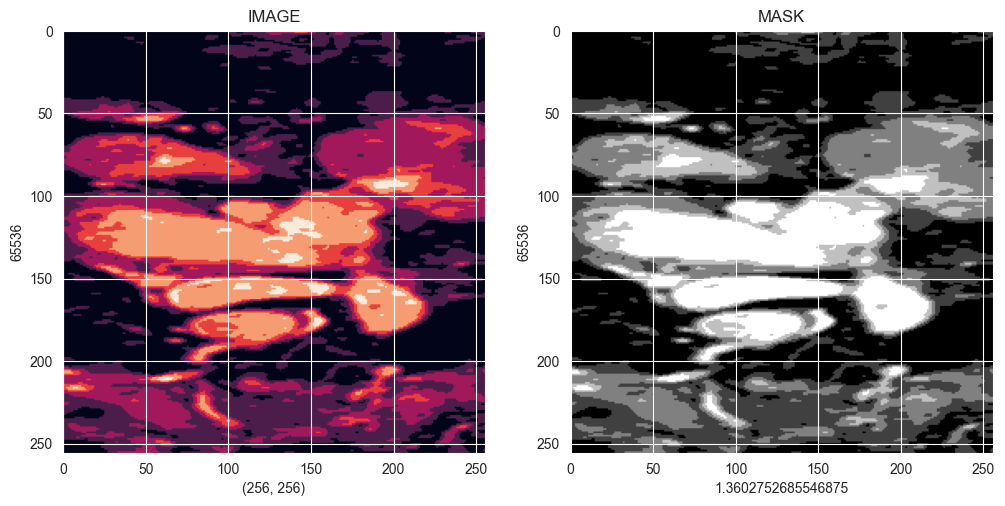

In [80]:
figure,axis = plt.subplots(1,2,figsize=(12,12))

Picking_Example_IMG = Image_List[11]
Picking_Example_Label = Label_List[11]
Picking_Example_Label = Picking_Example_Label.astype("uint8")
Picking_Example_IMG = Picking_Example_IMG.astype("uint8")

Blend_Image = cv2.addWeighted(Picking_Example_IMG,0.8,Picking_Example_Label,0.4,0.5)

axis[0].imshow(Picking_Example_IMG)
axis[0].set_xlabel(Picking_Example_IMG.shape)
axis[0].set_ylabel(Picking_Example_IMG.size)
axis[0].set_title("IMAGE")

axis[1].imshow(Blend_Image,cmap="gray")
axis[1].set_xlabel(np.mean(Blend_Image))
axis[1].set_ylabel(Blend_Image.size)
axis[1].set_title("MASK")

TO ARRAY

In [81]:
X_TRAIN = np.array(Image_List,dtype="float32")
X_LABEL = np.array(Label_List,dtype="float32")

In [82]:
print(X_TRAIN.shape)
print(X_LABEL.shape)

(18, 256, 256)
(18, 256, 256)


In [83]:
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0],X_TRAIN.shape[1],X_TRAIN.shape[2],1)
X_LABEL = X_LABEL.reshape(X_LABEL.shape[0],X_LABEL.shape[1],X_LABEL.shape[2],1)

In [84]:
print(X_TRAIN.shape)
print(X_LABEL.shape)

(18, 256, 256, 1)
(18, 256, 256, 1)


In [85]:
print(X_TRAIN[0:-1].shape)

(17, 256, 256, 1)


## MODEL

In [86]:
Encoder = Sequential()
#
Encoder.add(Conv2D(32,(5,5),kernel_initializer = 'he_normal',use_bias=True,name="ENCODER_INPUT"))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(64,(5,5),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())
#
Encoder.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder.add(BatchNormalization())
Encoder.add(ReLU())



Decoder = Sequential()
#
Decoder.add(Conv2DTranspose(128,(2,2)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(64,(2,2)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(32,(5,5)))
Decoder.add(ReLU())
#
Decoder.add(Conv2DTranspose(1,(5,5),name="DECODER_OUTPUT"))

In [87]:
AE_Structure = Sequential([Encoder,Decoder])

In [88]:
AE_Structure.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.000001),metrics=["accuracy"])

In [116]:
AE_Model = AE_Structure.fit(X_TRAIN[0:-1],X_LABEL[0:-1],epochs=60)

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9623 - loss: 0.0581
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9625 - loss: 0.0572
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.9627 - loss: 0.0563
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9629 - loss: 0.0554
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.9630 - loss: 0.0545
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.9632 - loss: 0.0537
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.9633 - loss: 0.0528
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.9635 - loss: 0.0520
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.9636 - loss: 0.0512
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.9638 - loss: 0.0503
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9639 - loss: 0.0495
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9640 - loss: 0.0487
E

In [117]:
Prediction_MASK = AE_Structure.predict(X_TRAIN[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Text(0.5, 1.0, 'PREDICTION')

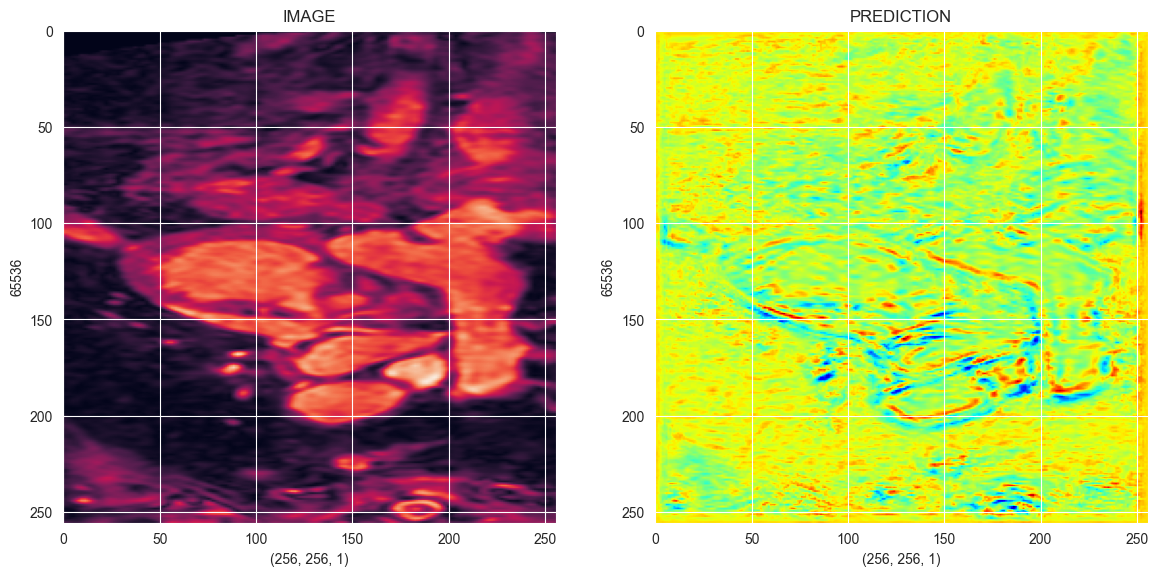

In [118]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 1

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

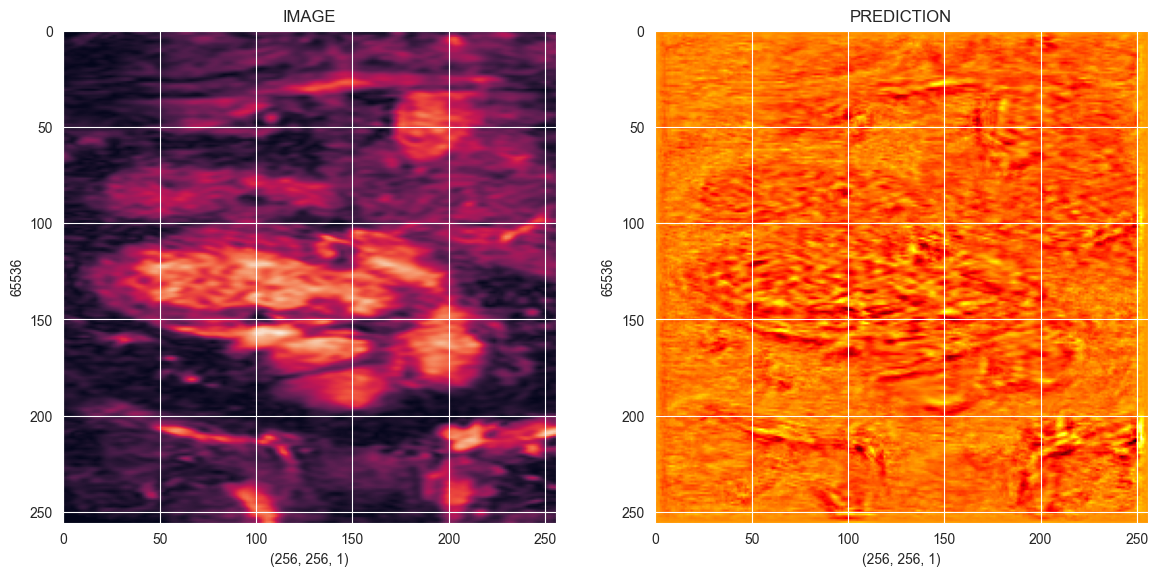

In [119]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 2

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="hot")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

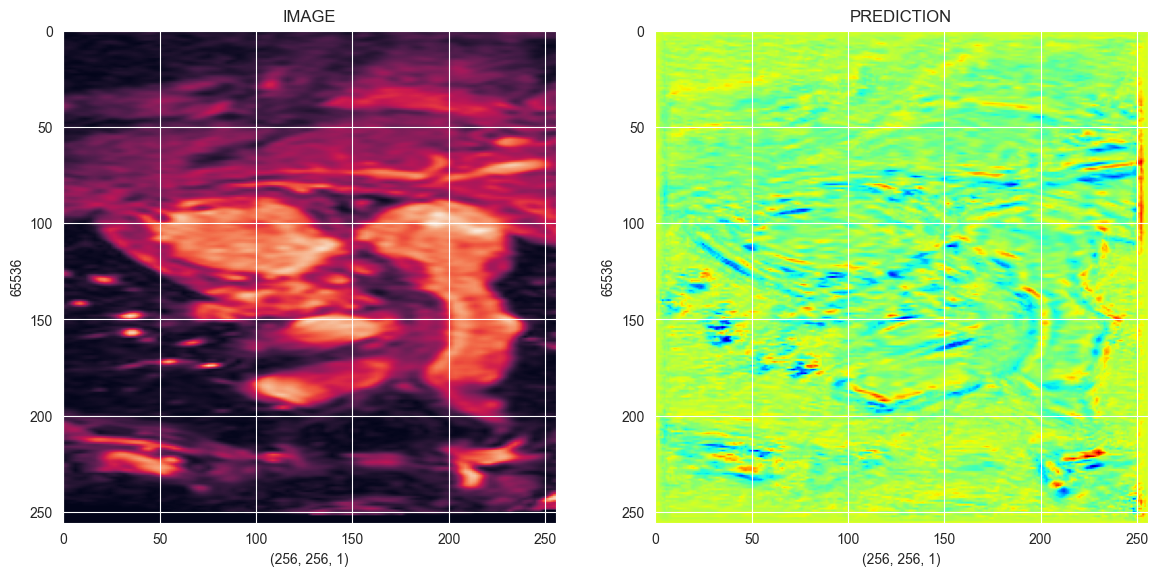

In [120]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 3

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

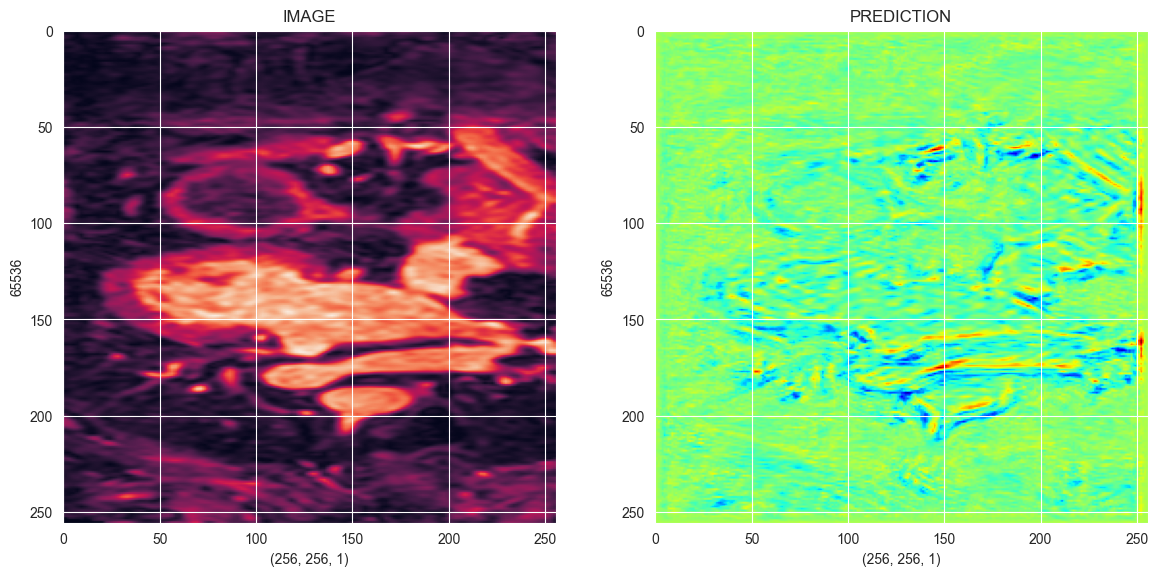

In [121]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 7

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

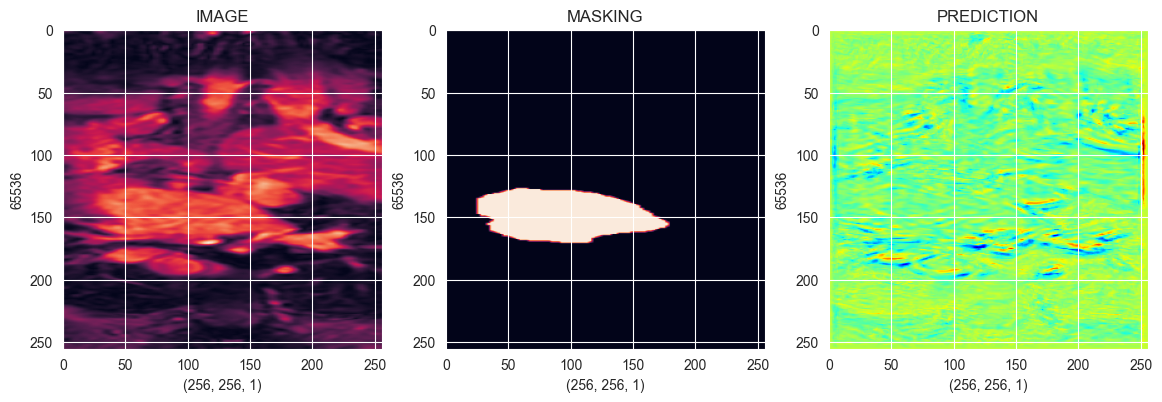

In [122]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 9

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

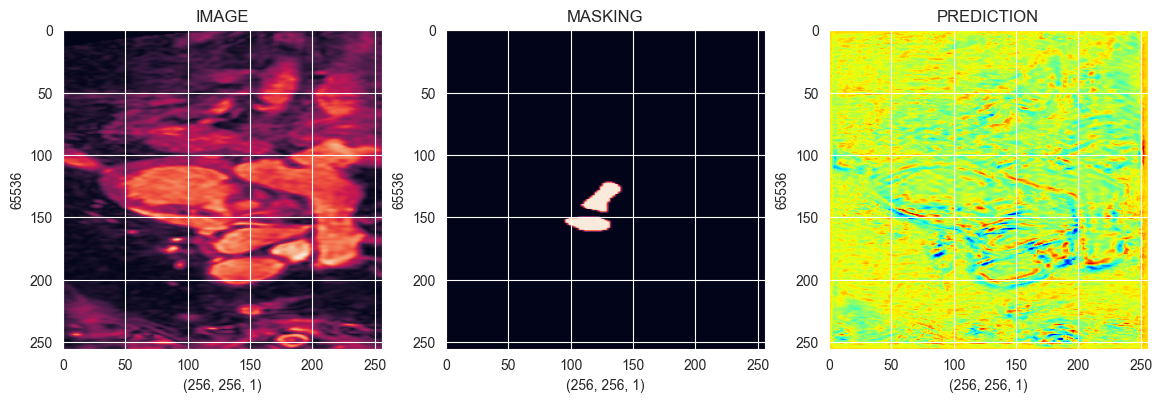

In [123]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 1

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

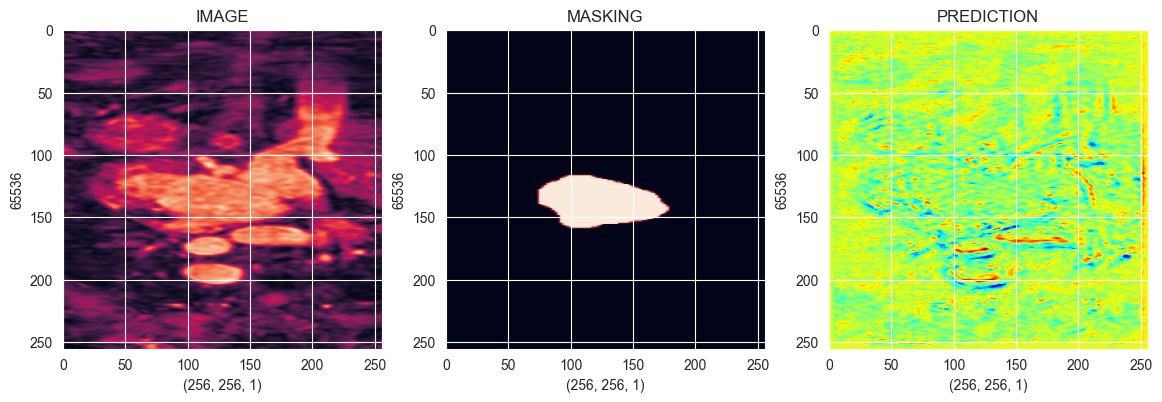

In [124]:
figure,axis = plt.subplots(1,3,figsize=(14,14))
img_number = 5

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_MASK[img_number]
Main_Mask = X_LABEL[img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Main_Mask)
axis[1].set_xlabel(Main_Mask.shape)
axis[1].set_ylabel(Main_Mask.size)
axis[1].set_title("MASKING")
axis[2].imshow(Predict_Mask,cmap="jet")
axis[2].set_xlabel(Predict_Mask.shape)
axis[2].set_ylabel(Predict_Mask.size)
axis[2].set_title("PREDICTION")

In [125]:
print(X_TRAIN[17:].shape)

(1, 256, 256, 1)


In [126]:
Prediction_NON_SEEN = AE_Structure.predict(X_TRAIN[17:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


Text(0.5, 1.0, 'PREDICTION')

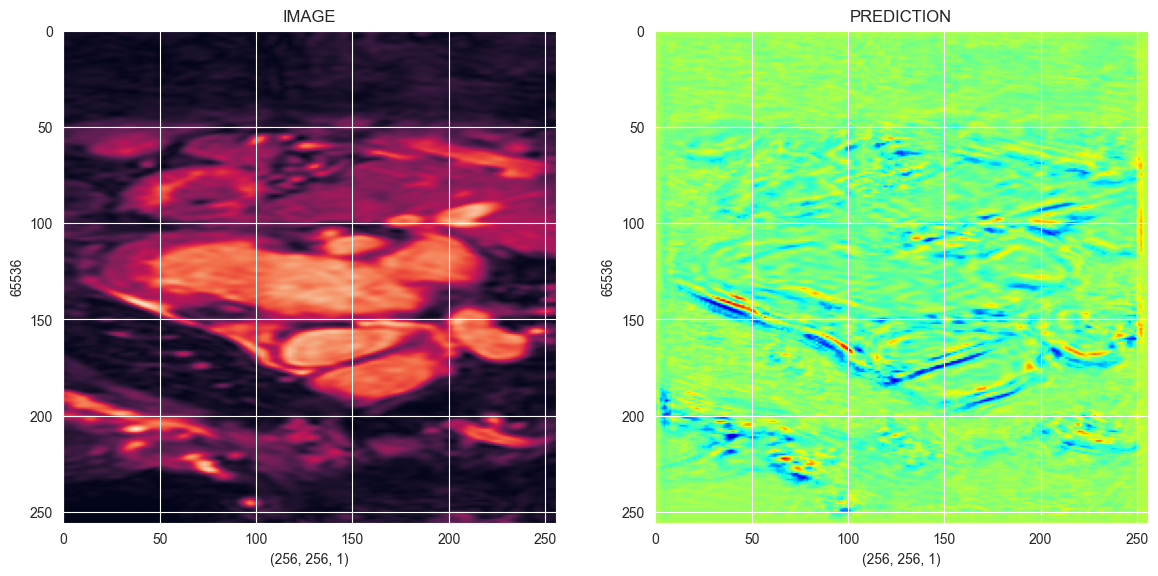

In [127]:
figure,axis = plt.subplots(1,2,figsize=(14,14))
img_number = 17

Original_Img = X_TRAIN[img_number]
Predict_Mask = Prediction_NON_SEEN[0]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Mask,cmap="jet")
axis[1].set_xlabel(Predict_Mask.shape)
axis[1].set_ylabel(Predict_Mask.size)
axis[1].set_title("PREDICTION")